In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [5]:
#  Read cvs file

# Wild fire year wise count dataset
wildfire_count_1983_2020 = pd.read_csv("wildfire_source_data/wildfire_count_1983_2020.csv")

# Average temperature from 1991 - 2020 for contiguous US 
average_temp_1983_2020 = pd.read_csv("wildfire_source_data/average_temp_1983_2020.txt")
average_temp_1983_2020.head()

,Year,Average_Temp
0,1983,51.88
1,1984,51.97
2,1985,51.30
3,1986,53.32
4,1987,53.33


In [6]:
# Data cleansing 

# sorting the average_temp "Year" by decending order inorder to be able to merge with wild fire count  
sorted_average_temp = average_temp_1983_2020.sort_values(by="Year", ascending=False)
average_temp_final = sorted_average_temp.reset_index(drop = True)

# formatting the "," from Fire and Acres column 
fires = wildfire_count_1983_2020['Fires'].str.replace(',', '').astype(int)
acres = wildfire_count_1983_2020['Acres'].str.replace(',', '').astype(int)
year = wildfire_count_1983_2020['Year']

# creating a new dataframe after removing the "," from wildfire_count_1983_2020 dataset
wild_fire_count_df = pd.DataFrame({"WildFire_Count":fires,
                                   "Acres_Burned":acres,
                                   "Year" : year})

# Merge two dataframes using an inner join
wildfire_merged_df = pd.merge(wild_fire_count_df, average_temp_final, how ="inner", on="Year")
wildfire_merged_df.head()

,WildFire_Count,Acres_Burned,Year,Average_Temp
0,58950,10122336,2020,54.36
1,50477,4664364,2019,52.68
2,58083,8767492,2018,53.52
3,71499,10026086,2017,54.55
4,67743,5509995,2016,54.92


Text(0, 0.5, 'Number of wild fires')

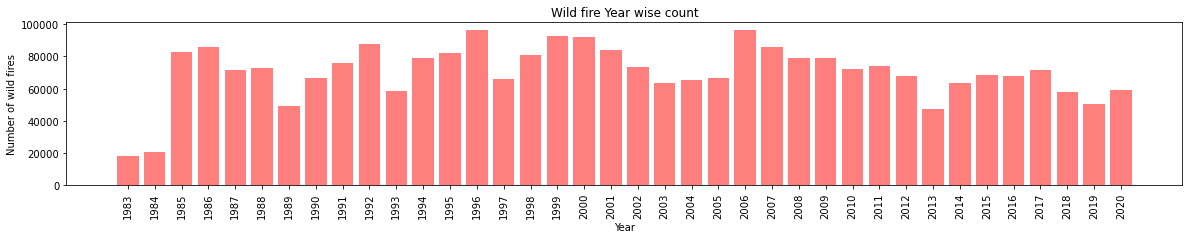

In [7]:
# Generating bar chart using matplotlib
x_axis = wildfire_merged_df['Year'] 
y_axis = wildfire_merged_df['WildFire_Count']

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(x_axis, rotation="vertical")

# Set a Title and labels
plt.title("Wild fire Year wise count")
plt.xlabel("Year")
plt.ylabel("Number of wild fires")

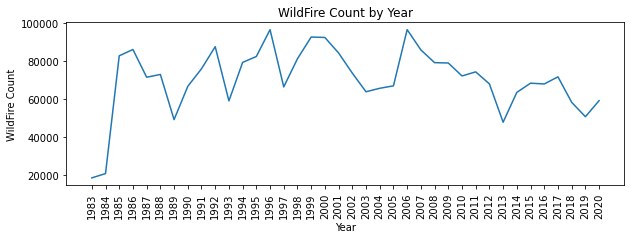

In [8]:
# Generating line plot using matplotlib
x_axis = wildfire_merged_df['Year'] 
y_axis = wildfire_merged_df['WildFire_Count']
plt.figure(figsize=(10,3))
plt.plot(x_axis,y_axis)
plt.xticks(x_axis,rotation='vertical')
plt.title('WildFire Count by Year')
plt.ylabel('WildFire Count')
plt.xlabel('Year')
# plt.savefig("../output_data/wild_fire_lineplot.png")
plt.show()

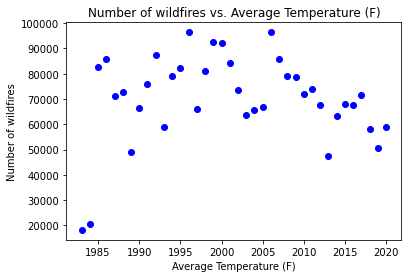

In [9]:
# Create x and y axis for scatter chart
x_axis = wildfire_merged_df['Year'] 
y_axis = wildfire_merged_df['WildFire_Count']

# Create scatter chart to display number of wildfire vs. average temp.
plt.scatter(x_axis, y_axis, color='b')
plt.title("Number of wildfires vs. Average Temperature (F)")
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of wildfires")
plt.show()

y = 1872094.81x + -94199039.06
The r-squared is: 0.37934974758095236


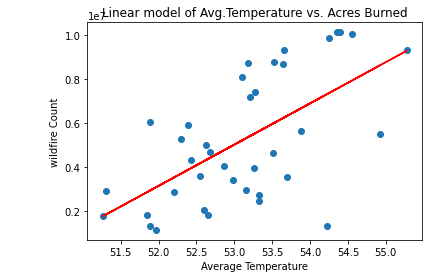

The correlation coefficient between wildFire Count and Acres burned value is 0.62


In [10]:
# Generate a scatter plot of WildFire count Vs.Average Temperature
# Add the linear regression equation and line to plot 

# x and y axis of the scatter plot
x_values = wildfire_merged_df['Average_Temp']
y_values = wildfire_merged_df['Acres_Burned']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,38),fontsize=14,color="red")
plt.title("Linear model of Avg.Temperature vs. Acres Burned")
plt.xlabel('Average Temperature')
plt.ylabel('wildfire Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation coefficient between wildFire Count and Acres burned value is {corr_coefficient}')


In [11]:
# Using the regression line and predicted temperature for 2022 (53.71), predict the number of wildfire in 2022
# The line equation is y = 1872094.81x + -94199039.06
wildfire_2022 = (1872094.81 * 53.71) -94199039.06
print(f'The number of acresburn predictd for the year 2022 is {round(wildfire_2022, 0)}')

The number of acresburn predictd for the year 2022 is 6351173.0


y = 4789.7x + -184075.08
The r-squared is: 0.0704837809277045


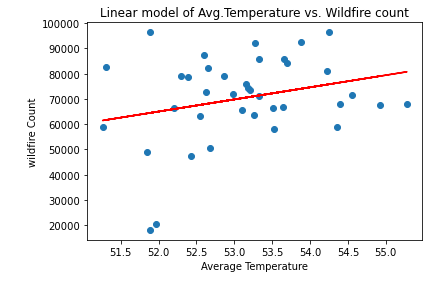

The correlation coefficient between Average Temperature and Wildfire Count value is 0.27


In [12]:
# Generate a scatter plot of WildFire count Vs.Average Temperature
# Add the linear regression equation and line to plot 

# x and y axis of the scatter plot
x_values = wildfire_merged_df['Average_Temp']
y_values = wildfire_merged_df['WildFire_Count']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,38),fontsize=15,color="red")
plt.title("Linear model of Avg.Temperature vs. Wildfire count")
plt.xlabel('Average Temperature')
plt.ylabel('wildfire Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation coefficient between Average Temperature and Wildfire Count value is {corr_coefficient}')

In [203]:
# Using the regression line and predicted temperature for 2022 (53.71), predict the number of wildfire in 2022
# The line equation is y = 4789.7x + -184075.08
wildfire_2022 = (4789.7 * 53.71) -184075.08
print(f'The number of wildfires predicted for the year 2022 is: {round(wildfire_2022, 0)}')

The number of wildfires predicted for the year 2022 is: 73180.0
